In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [7]:
pos_data = pd.read_csv('/Users/I566184/bachelorarbeit_coding/mesogeos/ml_tracks/a.fire_danger/a.danger_forecasting/positives.csv', parse_dates=['time'])
neg_data = pd.read_csv('/Users/I566184/bachelorarbeit_coding/mesogeos/ml_tracks/a.fire_danger/a.danger_forecasting/negatives.csv', parse_dates=['time'])

In [9]:
pos_data['row_id'] = range(len(pos_data))


In [10]:
pos_data

,time,aspect,burned_areas,curvature,d2m,dem,ignition_points,lai,lst_day,lst_night,...,lc_settlement,lc_shrubland,lc_sparse_vegetation,lc_water_bodies,lc_wetland,population,burned_area_has,time_idx,sample,row_id
0,2006-07-29,182.77820,0.0,-1469.686900,289.78036,142.89676,0.0,0.5,321.16000,295.52000,...,0.00000,0.0,0.000000,0.0,0.0,0.20321,40.0,0,0,0
1,2006-07-30,182.77820,0.0,-1469.686900,290.09662,142.89676,0.0,0.5,317.60000,293.63998,...,0.00000,0.0,0.000000,0.0,0.0,0.20321,40.0,1,0,1
2,2006-07-31,182.77820,0.0,-1469.686900,290.19055,142.89676,0.0,0.5,316.90000,293.00000,...,0.00000,0.0,0.000000,0.0,0.0,0.20321,40.0,2,0,2
3,2006-08-01,182.77820,0.0,-1469.686900,290.22266,142.89676,0.0,0.5,316.80000,294.66000,...,0.00000,0.0,0.000000,0.0,0.0,0.20321,40.0,3,0,3
4,2006-08-02,182.77820,0.0,-1469.686900,290.36680,142.89676,0.0,0.5,315.41998,295.91998,...,0.00000,0.0,0.000000,0.0,0.0,0.20321,40.0,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257215,2015-07-19,351.22073,0.0,-21.881104,287.77030,505.24857,0.0,0.2,316.25998,298.19998,...,0.22604,0.0,0.576602,0.0,0.0,5349.81450,138.0,25,8573,257215
257216,2015-07-20,351.22073,0.0,-21.881104,285.27957,505.24857,0.0,0.2,323.88000,NaN,...,0.22604,0.0,0.576602,0.0,0.0,5349.81450,138.0,26,8573,257216
257217,2015-07-21,351.22073,0.0,-21.881104,283.50925,505.24857,0.0,0.2,320.12000,NaN,...,0.22604,0.0,0.576602,0.0,0.0,5349.81450,138.0,27,8573,257217
257218,2015-07-22,351.22073,0.0,-21.881104,286.04520,505.24857,0.0,0.2,324.34000,298.41998,...,0.22604,0.0,0.576602,0.0,0.0,5349.81450,138.0,28,8573,257218


In [72]:
row_id = 124369
timeframe = pos_data[(pos_data['row_id'].between(row_id -29 , row_id)) & (pos_data['x'] == pos_data['x'].iloc[row_id]) & (pos_data['y'] == pos_data['y'].iloc[row_id])]
timeframe

,time,aspect,burned_areas,curvature,d2m,dem,ignition_points,lai,lst_day,lst_night,...,lc_settlement,lc_shrubland,lc_sparse_vegetation,lc_water_bodies,lc_wetland,population,burned_area_has,time_idx,sample,row_id
124350,2020-07-19,32.96067,0.0,-31260.78,288.71567,742.5725,0.0,6.6,290.86000,288.46000,...,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0,4145,124350
124351,2020-07-20,32.96067,0.0,-31260.78,288.63290,742.5725,0.0,6.6,NaN,290.12000,...,0.0,0.0,0.0,0.0,0.0,0.0,53.0,1,4145,124351
124352,2020-07-21,32.96067,0.0,-31260.78,287.56638,742.5725,0.0,6.6,301.00000,292.28000,...,0.0,0.0,0.0,0.0,0.0,0.0,53.0,2,4145,124352
124353,2020-07-22,32.96067,0.0,-31260.78,291.17620,742.5725,0.0,6.6,301.18000,293.44000,...,0.0,0.0,0.0,0.0,0.0,0.0,53.0,3,4145,124353
124354,2020-07-23,32.96067,0.0,-31260.78,290.18472,742.5725,0.0,6.6,303.86000,293.74000,...,0.0,0.0,0.0,0.0,0.0,0.0,53.0,4,4145,124354
124355,2020-07-24,32.96067,0.0,-31260.78,288.90723,742.5725,0.0,6.6,303.82000,295.46000,...,0.0,0.0,0.0,0.0,0.0,0.0,53.0,5,4145,124355
124356,2020-07-25,32.96067,0.0,-31260.78,290.37946,742.5725,0.0,6.6,302.13998,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,53.0,6,4145,124356
124357,2020-07-26,32.96067,0.0,-31260.78,289.79650,742.5725,0.0,6.6,299.52000,291.18000,...,0.0,0.0,0.0,0.0,0.0,0.0,53.0,7,4145,124357
124358,2020-07-27,32.96067,0.0,-31260.78,288.25247,742.5725,0.0,6.5,299.47998,293.10000,...,0.0,0.0,0.0,0.0,0.0,0.0,53.0,8,4145,124358
124359,2020-07-28,32.96067,0.0,-31260.78,289.90698,742.5725,0.0,6.5,305.38000,294.68000,...,0.0,0.0,0.0,0.0,0.0,0.0,53.0,9,4145,124359


In [73]:
continuous_vars_full = ['t2m', 'd2m', 'lst_day', 'lst_night', 'rh', 'tp', 'ssrd', 'wind_speed', 'wind_direction', 'ndvi', 'lai', 'smi', 'sp']
continuous_vars_temp = ['t2m', 'd2m', 'lst_day', 'lst_night']
continuous_vars = ['t2m', 'd2m', 'lst_day', 'lst_night', 'rh', 'tp', 'wind_speed', 'ndvi', 'lai', 'smi']

#time_idx = 0 represents 30 days before the fire
#time_idx = 29 represents 1 day before the fire
def scaled_timeframe(timeframe, continuous_vars):
    scaler = MinMaxScaler()
    scaled_timeframe = pd.DataFrame(scaler.fit_transform(timeframe[continuous_vars]), columns=continuous_vars)
    scaled_timeframe['row_id'] = range(len(scaled_timeframe))
    return scaled_timeframe

def lineplot_timeframe(timeframe, continuous_vars):
    plt.figure(figsize=(14, 7))
    for var in continuous_vars:
        if var in scaled_timeframe.columns:
            plt.plot(timeframe['row_id'], timeframe[var], label=var)

    plt.title("Flow of continuous Mesogeos variables")
    plt.xlabel("Tage vor Feuer")
    plt.ylabel("Wert")
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def lineplot_separat(timeframe, continuous_vars):
    n = len(continuous_vars)
    fig, axes = plt.subplots(n, 1, figsize=(12, 3 * n), sharex=True)
    x = timeframe['row_id']
    
    for i, var in enumerate(continuous_vars):
        y = timeframe[var]
        axes[i].plot(x, y, label='Wert')
    
        mask = ~np.isnan(y)
        x_valid = x[mask]
        y_valid = y[mask]
    
        if len(x_valid) > 1:
            coeffs = np.polyfit(x_valid, y_valid, deg=1)
            trend = np.poly1d(coeffs)
            axes[i].plot(x_valid, trend(x_valid), 'r--', label='Trend')
            axes[i].set_ylabel(var)
            axes[i].grid(True)
            axes[i].legend(loc='upper right')

    axes[-1].set_xlabel("Days")
    plt.tight_layout()
    plt.show()

def heatmap_timeframe(timeframe, continuous_vars):
    heatmap_df = timeframe[continuous_vars].copy()
    heatmap_df['row_id'] = timeframe['row_id'].values
    heatmap_df = heatmap_df.set_index('row_id')

    plt.figure(figsize=(12, len(continuous_vars) * 0.5 + 3))
    sns.heatmap(heatmap_df.T, cmap="coolwarm", cbar=True) #or use viridis
    plt.title("Heatmap: Flow of continuous variables (30 days before fire)")
    plt.xlabel("Days")
    plt.ylabel("Mesogeos Variables")
    plt.tight_layout()
    plt.show()

### Plot biggest Fire
Ignition date: 2017-09-06
Country: Spain

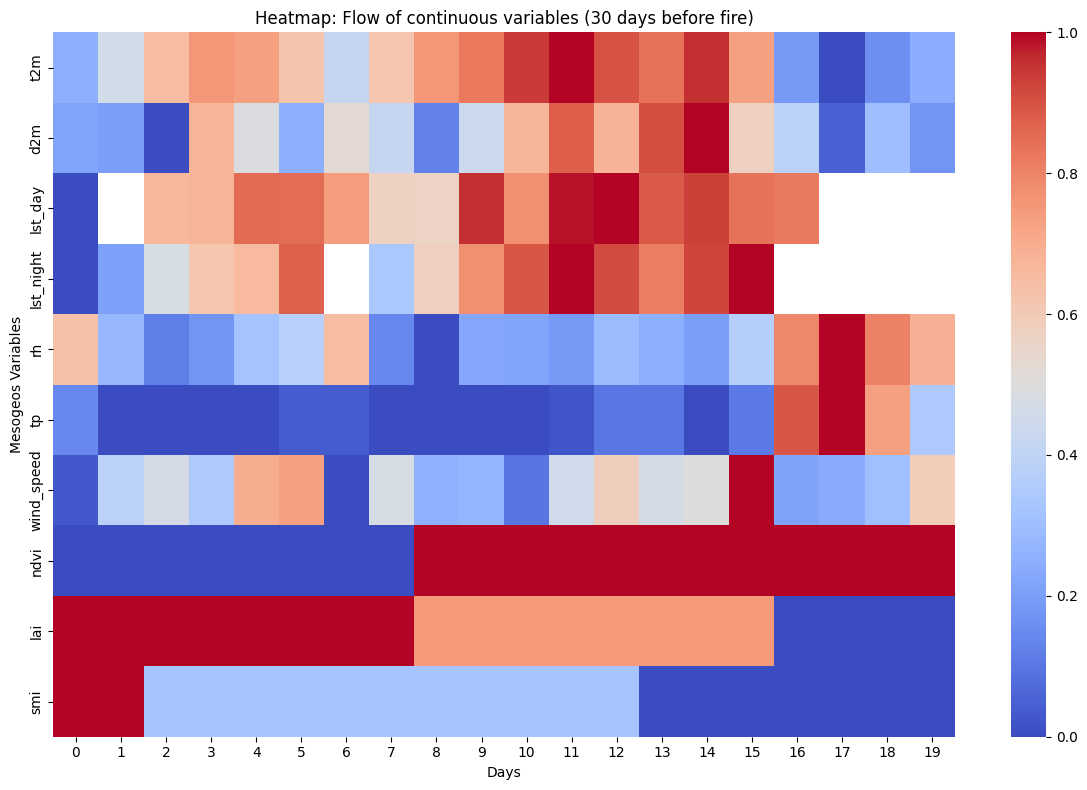

In [74]:
scaledTimeframe = scaled_timeframe(timeframe, continuous_vars)
heatmap_timeframe(scaledTimeframe, continuous_vars)

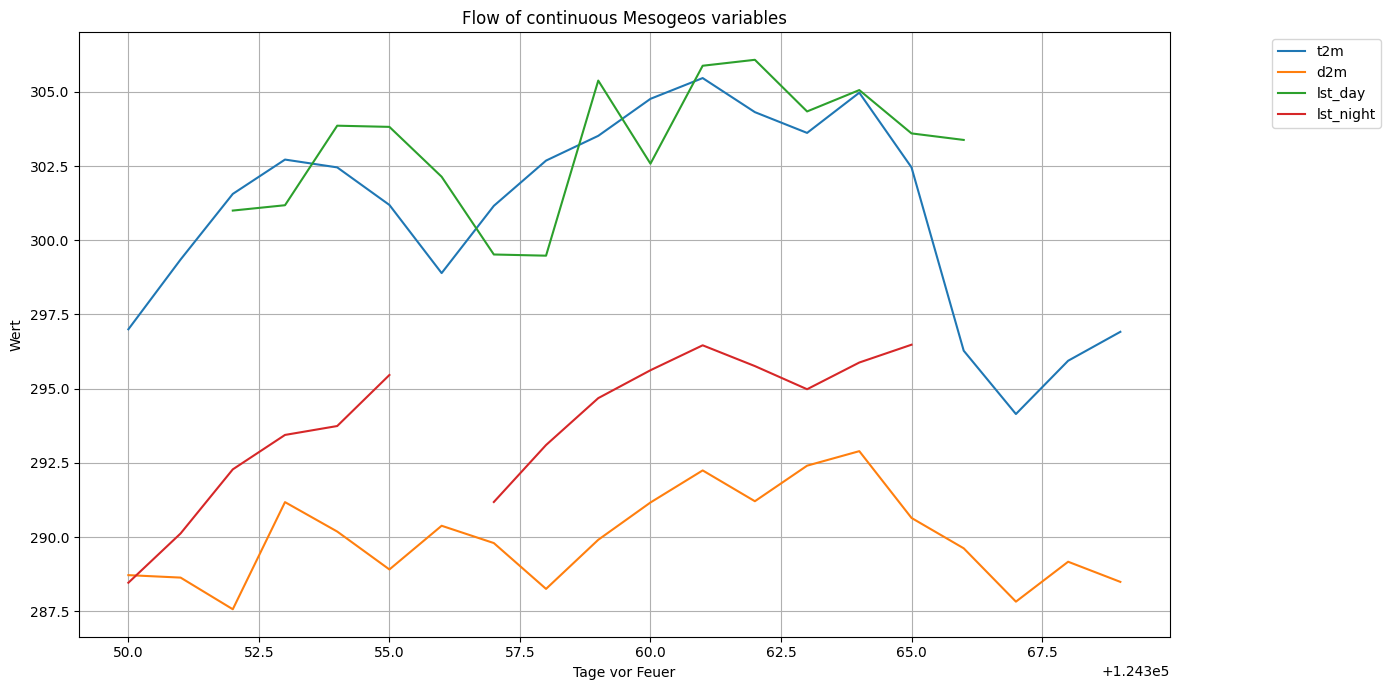

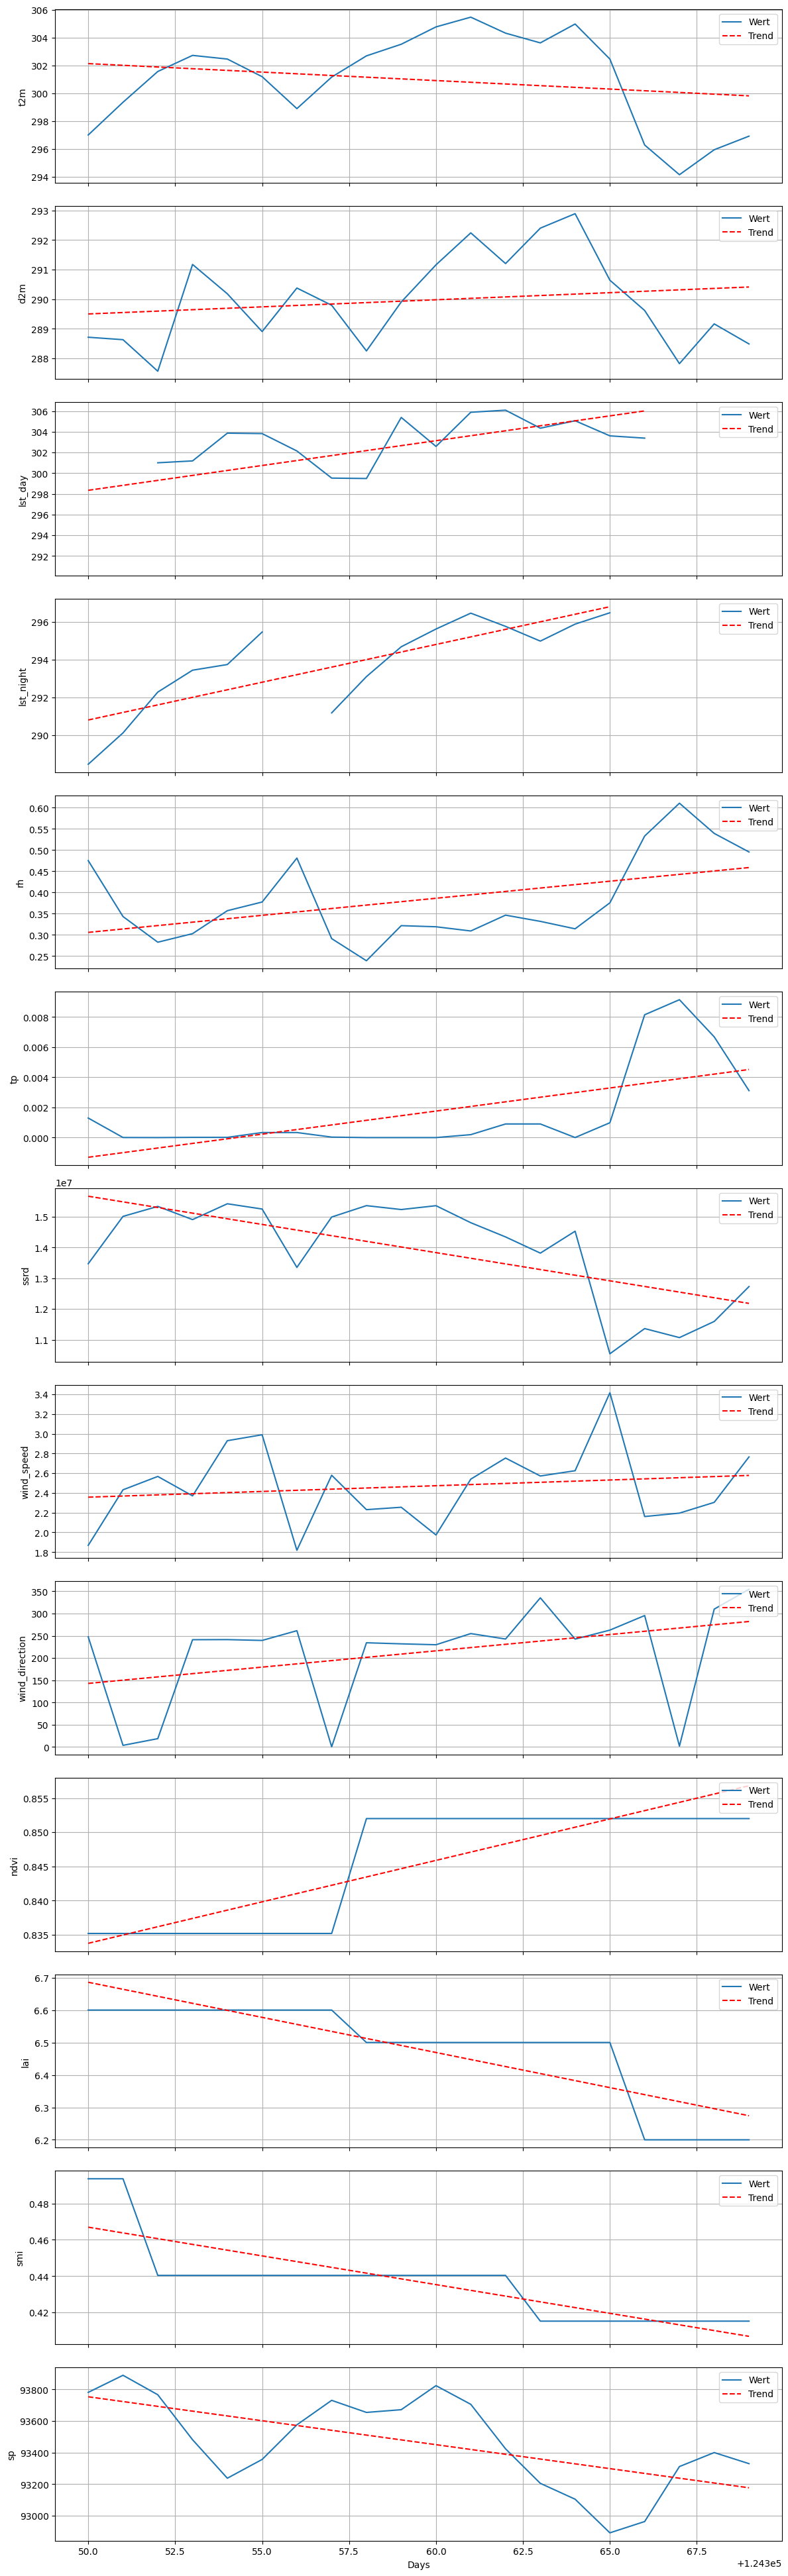

In [75]:
scaled_timeframe = scaled_timeframe(timeframe, continuous_vars_full)
lineplot_timeframe(timeframe, continuous_vars_temp)
lineplot_separat(timeframe, continuous_vars_full)